<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customer-segmentation-via-a-cohort-analysis-and-RFM-model" data-toc-modified-id="Customer-segmentation-via-a-cohort-analysis-and-RFM-model-1">Customer segmentation via a cohort analysis and RFM model</a></span></li><li><span><a href="#1.-Preparing-data" data-toc-modified-id="1.-Preparing-data-2">1. Preparing data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cleaning-Data" data-toc-modified-id="Cleaning-Data-2.0.1">Cleaning Data</a></span></li><li><span><a href="#Feature-engineer" data-toc-modified-id="Feature-engineer-2.0.2">Feature engineer</a></span></li></ul></li></ul></li><li><span><a href="#2.-Exploratory-Data-Analysis" data-toc-modified-id="2.-Exploratory-Data-Analysis-3">2. Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#2.-1-Business-Trends" data-toc-modified-id="2.-1-Business-Trends-3.1">2. 1 Business Trends</a></span></li><li><span><a href="#2.-2.-Analyzing-customers-trends" data-toc-modified-id="2.-2.-Analyzing-customers-trends-3.2">2. 2. Analyzing customers trends</a></span><ul class="toc-item"><li><span><a href="#Customers-demographics" data-toc-modified-id="Customers-demographics-3.2.1">Customers demographics</a></span></li><li><span><a href="#Customers-behaviour" data-toc-modified-id="Customers-behaviour-3.2.2">Customers behaviour</a></span></li></ul></li></ul></li><li><span><a href="#3.-Customer-segmentation" data-toc-modified-id="3.-Customer-segmentation-4">3. Customer segmentation</a></span><ul class="toc-item"><li><span><a href="#3.1-Cohort-analysis" data-toc-modified-id="3.1-Cohort-analysis-4.1">3.1 Cohort analysis</a></span><ul class="toc-item"><li><span><a href="#Customer-Retention-Rate-(CRR)" data-toc-modified-id="Customer-Retention-Rate-(CRR)-4.1.1">Customer Retention Rate (CRR)</a></span></li><li><span><a href="#Average-Purchased-Quantity" data-toc-modified-id="Average-Purchased-Quantity-4.1.2">Average Purchased Quantity</a></span></li><li><span><a href="#Monetary-value-per-customer" data-toc-modified-id="Monetary-value-per-customer-4.1.3">Monetary value per customer</a></span></li></ul></li><li><span><a href="#3.2-Recency-Frequency-Monetary-Value-(RFM)-model" data-toc-modified-id="3.2-Recency-Frequency-Monetary-Value-(RFM)-model-4.2">3.2 Recency Frequency Monetary Value (RFM) model</a></span></li></ul></li><li><span><a href="#4.-Conclusion-and-recommendations" data-toc-modified-id="4.-Conclusion-and-recommendations-5">4. Conclusion and recommendations</a></span></li></ul></div>

# Customer segmentation via a cohort analysis and RFM model

In this project, I will use the "Online Retail Database" that contains customers' transactions between 2010 and 2011 from a 
non-store online retail based and registered in UK. The main goal is to provide a market segmentation of the clients, and provide valuable insights that can be used by the marketing department in order to target better their clients. This project is divided in fourth sections: 1) Preparing Data, 2) Exploratory Data Analysis, 3) Customer Segmentation, 4) Conclusion and recommendations    

# 1. Preparing data

**Importing libraries and data**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import geopy.distance 
import datetime as dt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
online=pd.read_csv("C:\\Users\\Nallely Abigail Cruz\\Desktop\\kaggle\\ecommerce\\data.csv",encoding="latin1")
online.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Description of variables**:
The database as well as the description of the eight variables was provided by the [UCLI ML repo](http://archive.ics.uci.edu/ml/datasets/Online+Retail).
- " InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in pounds sterling(£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides."

### Cleaning Data

**Checking for duplicates and missing rows**

In [5]:
# Calculating number of rows that are duplicated
print(online.duplicated(keep="first").sum())
online.drop_duplicates(keep="first", inplace=True) #drop duplicate values

#Checking for missing rows:
online.isnull().sum()

5268


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

We identify 135,037 missing values for the Customer ID. We will eliminate those missing values because we are going to implement a customer segmentation that requires identification of customers.

In [6]:
online=online[online["CustomerID"].notnull()]

**Cleaning InvoiceDate**

In [7]:
# Tranforming the date into a datetime format
online["InvoiceDate"]=pd.to_datetime(online["InvoiceDate"],format ="%m/%d/%Y %H:%M")

**Cleaning InvoiceNo**

In [8]:
import re
online["type_invoiceno"]=online["InvoiceNo"].str.extract(r"([A-Za-z])")
online["type_invoiceno"].fillna("Numb",inplace=True)
online.type_invoiceno.value_counts()

Numb    392732
C         8872
Name: type_invoiceno, dtype: int64

We identify 2 categories of Invoice No: a) Number, b) C which stands for cancellations. We are going to explore in detail a customer containing a C to confirm how a cancellation is reflected in the other variables. 

In [9]:
# we choose one of the Customer ID which invoice contains a "C" to explore:
x=online[online["CustomerID"]==17548]
x.sort_values(["Description","InvoiceDate","InvoiceNo"]).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,type_invoiceno
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,C
165028,550755,22926,IVORY GIANT GARDEN THERMOMETER,4,2011-04-20 12:01:00,5.95,17548.0,United Kingdom,Numb
177223,C552049,22926,IVORY GIANT GARDEN THERMOMETER,-4,2011-05-06 10:00:00,5.95,17548.0,United Kingdom,C
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom,Numb
177224,C552049,22585,PACK OF 6 BIRDY GIFT TAGS,-24,2011-05-06 10:00:00,1.25,17548.0,United Kingdom,C
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,C
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,C


For this customer, we see that each "Description" is duplicated. It seems the customer ordered a certain quantity (Quantity >0) and then cancelled it (Quantity <0). Two elements support this hypothesis: 1) For the same item, "Quantity" is positive and changes to negative. 2)When the "Quantity" is positive, the date is smaller or the same than for the negative quantities. 

In [10]:
# Creating a variable with the amount of cancellations: (NONE cancellation and at least one)
online["type_invoice_numeric"]=0 # invoice where all the values are numbers 
online.loc[online.type_invoiceno == "C", "type_invoice_numeric"] = 1 # invoice that was cancelled
# Variable that contains the number of cancellations of the Customer ID
online["any_cancel"]=online.groupby("CustomerID")["type_invoice_numeric"].transform("sum")

**Quantity**

In [11]:
# We analyze the number of units ordered: 
online["Quantity"].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

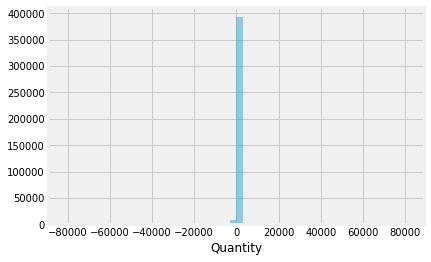

In [12]:
# When looking at the distibution of quantities purchased, we see the quantities oscillating between -80000 to +80000.
# Probably, those quantities were purchased and cancelled. 
sns.distplot(online["Quantity"],kde=False)

In [13]:
# Usually the outliers are defined by 3 standard deviations. However, if most of the clients are wholesalers, it is possible they might have ordered
# big quantities. 
online["zscore"]=(online["Quantity"]-online["Quantity"].mean())/online["Quantity"].std(ddof=0) 

# We are gonna drop quantities that has a zscore beyond 20 (7 customers)
# This stands for 7 customers that order as minimum -80,000 and a maximum of 80000
online["outliers"]=(abs(online["zscore"])>20).astype(int)
online.drop(online[online["outliers"]==1].index,inplace=True)

### Feature engineer

**Monetary value**

In [14]:
online["monetary_value"]=online["Quantity"]*online["UnitPrice"]

**Region of residence** (close far from UK)

In [15]:
# Identifying number of coutries: 37 countries where customers come from
online.Country.nunique(),online.Country.unique()

(37, array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
        'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
        'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
        'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
        'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
        'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
        'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
        'Malta', 'RSA'], dtype=object))

In [16]:
#Changing the abbreviations of the country: 
abbreviation={"EIRE":"Ireland","USA":"United States of America","RSA":"South Africa",'Czech Republic': "Czechia"}
online.replace({"Country":abbreviation},inplace=True)
countries=online.Country.unique()#list of the countries where the clients live

In [17]:
# Showing first 10 countries where customers live:
countries_customers_live=online.Country.value_counts(normalize=True)*100
countries_customers_live[:10] 

United Kingdom    88.825642
Germany            2.360570
France             2.110319
Ireland            1.861314
Spain              0.629485
Netherlands        0.590391
Belgium            0.515192
Switzerland        0.467383
Portugal           0.366287
Australia          0.313249
Name: Country, dtype: float64

Most of the customers are located in UK. 
We are gonna consider a variable of the distance where the customers live from UK to see if there are variations among the number of clients.

In [18]:
# We are gonna extract the coordinates of the countries were customers live: 
# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get a list (dataframe) of country centroids:list of 177 countries
centroids = world.centroid
centroid_list = pd.concat([world.name, centroids], axis=1)

#Getting the coordinates: 
centroid_list["coord"]=centroid_list[0].astype(str).str.split(" ")
centroid_list["longitude"]=centroid_list["coord"].apply(lambda x: x[1].replace("(","")).astype(float)
centroid_list["latitude"]=centroid_list["coord"].apply(lambda x: x[2].replace(")","")).astype(float)
centroid_list.drop(columns=[0,"coord"],inplace=True)

In [19]:
# Selecting the coordinates only for the 37 countries or places where customers live:
final_coordinates=centroid_list[centroid_list['name'].isin(countries)].copy() #filtering by 37 places 
final_coordinates['coordinates'] = list(zip(final_coordinates.latitude, final_coordinates.longitude)) #tuple of coordinates

#Calculating distance in km between UK and the rest of the countries
final_coordinates["distance"]=final_coordinates['coordinates'].apply(lambda x:geopy.distance.distance((53.914773,-2.853135),x).km)
final_coordinates=final_coordinates.drop(columns=["longitude","latitude","coordinates"])

In [20]:
# Attribute distances to the initial dataframe "Online"
dic_distances=pd.Series(final_coordinates.distance.values,index=final_coordinates.name).to_dict()
online["distance_uk"]=online["Country"].map(dic_distances)

# Attributing distance to channel islands (this region didnt appear in the original 177 countries)
online.loc[online["Country"]=="Channel Islands","distance_uk"]=663

In [21]:
# Creating a variable that classifies countries by distances:
def distance_uk(x):
    if x>=0 and x<1:
        return "United Kingdom"
    if x>=1 and x<=1000:
        return "1-1000"
    if x>1000 and x<=1500:
        return "1001-1500"
    if x>1500 and x<=2000:
        return "1501-2000"
    if x>2000 and x<=3000:
        return "2001-3000"
    if x>3000 and x<=5000:
        return "3001-5000"
    if pd.isnull(x):
        return "unknown"
    else: 
        return "More than 5000"
    
online["cat_distance_uk"]=online.distance_uk.apply(lambda x: distance_uk(x))
#identifying number of customers by distance to Uk and by county: 
online.groupby(["cat_distance_uk","Country"])["CustomerID"].nunique()

cat_distance_uk  Country                 
1-1000           Belgium                       25
                 Channel Islands                9
                 Denmark                        9
                 Germany                       95
                 Ireland                        3
                 Netherlands                    9
1001-1500        Austria                       11
                 Czechia                        1
                 France                        87
                 Poland                         6
                 Sweden                         8
                 Switzerland                   21
1501-2000        Iceland                        1
                 Italy                         15
                 Lithuania                      1
                 Norway                        10
                 Portugal                      19
                 Spain                         31
2001-3000        Finland                       12
        

For the purposes of this analysis, we are gonna use all the variables except for the StockCode and Description. 

In [22]:
# Droping variables that are not gonna be used for the analysis: 
online.drop(columns=["StockCode","Description"],inplace=True)
# Copy a dataframe that will be modified for the analysis: 
onlinewc=online.copy()

# 2. Exploratory Data Analysis

## 2. 1 Business Trends 

**Sales revenue and growth year**

In [23]:
onlinewc["InvoiceDate"]
onlinewc['date_column_trunc'] = online["InvoiceDate"].apply(lambda s: dt.date(s.year, s.month, 1))
# Calculating number of sales
mv_year_month=onlinewc.groupby(['date_column_trunc'],as_index=False)["monetary_value"].sum().round(2) 
#growth rate
mv_year_month["pct"]=round(mv_year_month["monetary_value"].pct_change()*100,2)
mv_year_month.set_index(["date_column_trunc"],inplace=True)

Text(0.5, 1.0, 'Sales revenue and Growth Year, 2010/12 to 2011/12')

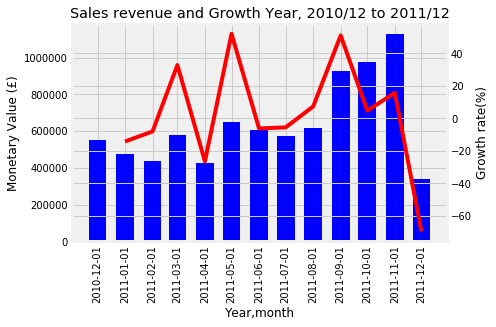

In [67]:
#visualizing number of sales and growth rate:
fig, ax1 = plt.subplots()
ax1.bar(mv_year_month.index, mv_year_month["monetary_value"],color='b',width=20)
ax2 = ax1.twinx()
ax2.plot(mv_year_month.index, mv_year_month["pct"], color='r')
ax1.set_xlabel('Year,month')
ax1.set_ylabel('Monetary Value (£)')
ax2.set_ylabel('Growth rate(%)')
ax1.set_xticks(mv_year_month.index)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_title('Sales revenue and Growth Year, 2010/12 to 2011/12')

This graph presents the sales revenue and growth rate from 2010/12 to 2011/12. Sales were higher during the last three months preceding December in comparison to the previous eight months.
The drastic drop in December is explained by the fact that the last observation in the database occurred on December 9th, 2011. We are missing the sales from the complete month and we are only observing the first week. 

**How many transactions do we have during 12/2010 and 12/2011?** 

In [25]:
# grouping by InvoiceNo (unique transaction)
number_transactions=onlinewc.groupby(["InvoiceNo"],as_index=False)["type_invoice_numeric"].sum()
total_transactions=len(number_transactions) # number of rows
purchases=len(number_transactions[number_transactions["type_invoice_numeric"]==0])# 0 means: no cancellation
percentage_cancellations=((total_transactions-purchases)/total_transactions)*100

print({"no_transactions":total_transactions,"total purchases":purchases, "percentage cancellations": round(percentage_cancellations,2)})

{'no_transactions': 22184, 'total purchases': 18533, 'percentage cancellations': 16.46}


**How many purchases and cancellations were made per each month?**

In [26]:
#we are gonna create a dictionnary where each entry is a copy of the dataframe for each month: 
year=onlinewc["date_column_trunc"].unique().tolist()
e_ym = {}
for i in year:
    df_0=onlinewc[onlinewc.date_column_trunc==i]
    e_ym[i]=df_0

In [27]:
transactions=[]
total_purchases=[]
pct_cancellations=[]

for i in year:
    number_transactions=e_ym[i].groupby(["InvoiceNo"],as_index=False)["type_invoice_numeric"].sum()
    total_transactions=len(number_transactions) # number of rows
    purchases=len(number_transactions[number_transactions["type_invoice_numeric"]==0])# 0 means: no cancellation
    percentage_cancellations=((total_transactions-purchases)/total_transactions)*100
    transactions.append(total_transactions)
    total_purchases.append(purchases)
    pct_cancellations.append(round(percentage_cancellations,2))

In [28]:
table=pd.DataFrame({"transactions":transactions,"purchases":total_purchases,"%cancellations":pct_cancellations},index=year)

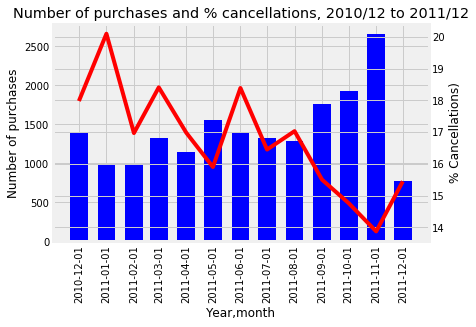

In [29]:
fig, ax1 = plt.subplots()
ax1.bar(table.index, table["purchases"], color='b',width=20)
ax2 = ax1.twinx()
ax2.plot(table.index, table["%cancellations"], color='r')
ax1.set_xlabel('Year,month')
ax1.set_ylabel('Number of purchases')
ax2.set_ylabel('% Cancellations)')
ax1.set_xticks(table.index)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_title('Number of purchases and % cancellations, 2010/12 to 2011/12')

plt.show()

One element underlying the trends in the sales revenue are the transactions, which are integrated by purchases and cancellations. 
- This online retail performed better by the end of the year in comparison to the previous eight months. Two forces constributed: an increase in the number of purchases and a decrease in the percentage of cancellations. 
- This positive trend might be associated with the christmas holiday season which might increase the purchases of all-occasion gifts.

**Trends in the number of customers over time**

In [30]:
# grouping the number of unique customers by year and month
y_m_c=onlinewc.groupby(['date_column_trunc'],as_index=True)["CustomerID"].nunique()
y_m_c_pct=round(y_m_c.pct_change()*100,2)
c=pd.concat([y_m_c,y_m_c_pct],axis=1).reset_index()
#rename columns "Customer ID"
cols=pd.Series(c.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
# rename the columns with the cols list.
c.columns=cols
c=c.rename(columns={"CustomerID.1":"Customers_pct"}).set_index("date_column_trunc")

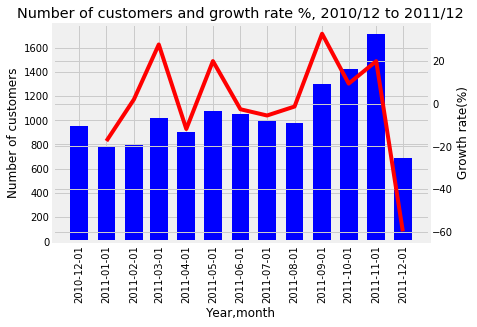

In [31]:
fig, ax1 = plt.subplots()
ax1.bar(c.index, c["CustomerID"], color='b',width=20)
ax2 = ax1.twinx()
ax2.plot(c.index, c["Customers_pct"], color='r')
ax1.set_xlabel('Year,month')
ax1.set_ylabel('Number of customers')
ax2.set_ylabel('Growth rate(%)')
ax1.set_xticks(c.index)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_title('Number of customers and growth rate %, 2010/12 to 2011/12')
plt.show()

We noticed that the number of customers within each month followed a similar trend to the sales revenue.The average number of clients was 1479 during the last three months of 2011, which was 35% higher than the average of customers from the previus eight months. 

## 2. 2. Analyzing customers trends

In the previous section, we identified two factors associated with the trends on sales: the transactions and the number of clients. It seems that by the end of 2011, there was an increase in sales that might be explained by the increase in the number of customers. If we want to continue increasing the revenue in 2012, it is important to learn from our customers. 
We are going to acquire insights into their demographics and how they behave.

### Customers demographics

**Where do the customers come from?**

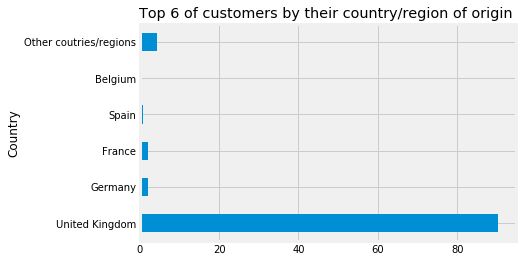

In [32]:
#Analyzing per country of origin: 
c_per_country=onlinewc.groupby(["Country"])["CustomerID"].nunique().sort_values(ascending=False).reset_index()
c_per_country["c_percentage"]=c_per_country["CustomerID"].apply(lambda x: x/sum(c_per_country["CustomerID"]))*100

#identifying top 5 and the rest of the countries/regions: 
top_5_countries=c_per_country.iloc[:5,[0,2]]
other_countries_sum=c_per_country.iloc[5:,2].sum()
table_f=top_5_countries.append({'Country' : 'Other coutries/regions', 'c_percentage' : other_countries_sum} , ignore_index=True)
table_f=table_f.set_index("Country").round(2)
table_f.plot.barh(title="Top 6 of customers by their country/region of origin ", legend=None)

We present the top 5 countries where our clients come from.   
- 90% of clients come from the United Kingdom. This number makes sense since the retailer is based in this region. 
- Germany, France, Spain and Belgium together represent 5.4% of the customers.  
- The remaining 4.6% comes from 32 other countries outside the UK. 
This suggets that countries located close to the United Kingdom might be more likely to make a purchase. We are gonna group our customers by distance in kilometers to the United Kingdom. 

Text(0, 0.5, 'Distance in km from UK')

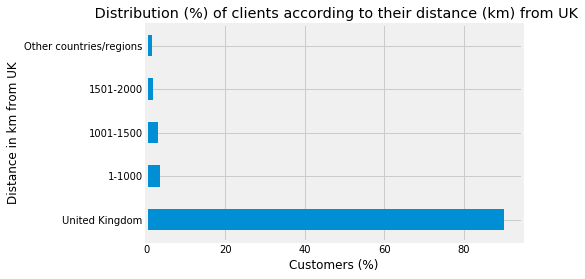

In [33]:
# analyzing per distance to UK: 
c_per_distance=onlinewc.groupby(["cat_distance_uk"])["CustomerID"].nunique().sort_values(ascending=False).reset_index()
c_per_distance["c_percentage"]=c_per_distance["CustomerID"].apply(lambda x: x/sum(c_per_distance["CustomerID"]))*100
c_per_distance=c_per_distance.round(2)

top_5_regions=c_per_distance.iloc[:4,[0,2]]
other_regions_sum=c_per_distance.iloc[4:,2].sum()
table_rf=top_5_regions.append({'cat_distance_uk' : 'Other countries/regions', 'c_percentage' : other_regions_sum},ignore_index=True)

table_rf.set_index("cat_distance_uk").plot.barh(title=" Distribution (%) of clients according to their distance (km) from UK", legend=None)
plt.xlabel('Customers (%)')
plt.ylabel('Distance in km from UK')


- 90% of clients come from the United Kingdom and 8% live in a country situated between 1000 and 2000 km from the United Kingdom. A slighlty percentage of the clients live in a country placed more than 2000 km from the UK. 

### Customers behaviour

**Where do the main sales come from?**

Text(0.5, 0, 'Sales revenue(%)')

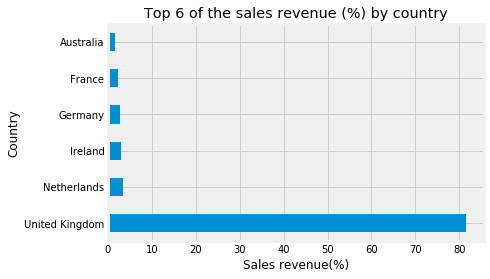

In [34]:
# Country of residence: 
sells_distance=onlinewc.groupby(["Country"])["monetary_value"].sum()
sells_distance_perc=sells_distance/sum(sells_distance)*100
sells_distance_perc=round(sells_distance_perc,2).sort_values(ascending=False)
sells_distance_perc.iloc[:6].plot.barh(title="Top 6 of the sales revenue (%) by country")
plt.xlabel('Sales revenue(%)')

##### In this chart, we present the 6 countries in which the monetary income (%) is the highest among the 37 countries where customers live. 
- 85 % of the sales revenue come from customers that live in the United Kingdom. 
- 9% of the customers live in a country from Europe: 4% in Netherlands, 3% live in Germany, 2% live in France. 
- Surprisingly, 2% live in Autralia which is the same percentage of clients living in France.  
- The 4% of remaining customers live in the rest of the other 31 countries 

Text(0, 0.5, 'Distance in km from UK')

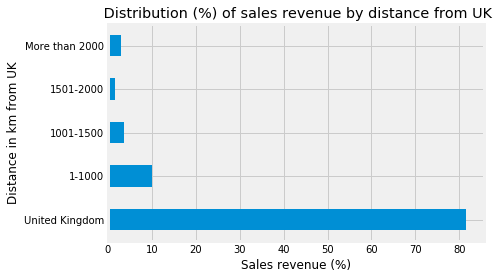

In [35]:
#Region of residence: 
sells_distance=onlinewc.groupby("cat_distance_uk")["monetary_value"].sum()
sells_distance_perc=sells_distance/sum(sells_distance)*100
sells_distance_perc=round(sells_distance_perc,2).sort_values(ascending=False).reset_index()

other_regions_sum=sells_distance_perc.iloc[[3,5,6,7],1].sum()
table=sells_distance_perc.iloc[[0,1,2,4],:].append({'cat_distance_uk' : 'More than 2000', 'monetary_value' : other_regions_sum},ignore_index=True).set_index("cat_distance_uk")

table.plot.barh(title=" Distribution (%) of sales revenue by distance from UK",legend=None)
plt.xlabel('Sales revenue (%)')
plt.ylabel('Distance in km from UK')

Grouping the customers by their distance in kilometers to the United Kingdom shows that 14% of the customers live in a range from 1 to 2000 km, which corresponds to the countries located in Europe. 
The customers which country is located more than 2000 km away from the UK have a slightly participation from the total sales (3%). 

**When are the transactions more likely to be done?**

In [36]:
purchases=onlinewc[onlinewc.type_invoice_numeric==0].copy()
purchases["purchases"]=purchases.InvoiceDate.dt.dayofweek
purhases_dow=purchases["purchases"].value_counts(normalize=True).sort_index()*100

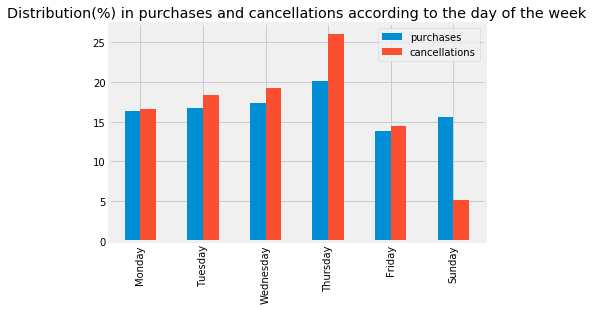

In [37]:
cancellation=onlinewc[onlinewc.type_invoice_numeric==1].copy()
cancellation["cancellations"]=cancellation.InvoiceDate.dt.dayofweek
cancellation_dow=cancellation["cancellations"].value_counts(normalize=True).sort_index()*100

day_week_transactions=pd.concat([purhases_dow,cancellation_dow], axis=1).round(2)
day_week_transactions.rename(index={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"},inplace=True)

day_week_transactions.plot.bar(title="Distribution(%) in purchases and cancellations according to the day of the week")

In the previous graph, we observed the percentage of purchases and cancellations made during the week. 
- One quarter of the cancellations are made on Thursday, whereas only 5% are made on Sunday. 
- There are no transactions on Saturday. 
- For the rest of the days, the percentages between purchases and cancellations are similar. 

# 3. Customer segmentation

One way to continue increasing sales revenue is by focusing on the customer retention. According to a study made by [Bain & Company](https://www.retentionscience.com/blog/customer-retention-should-outweigh-customer-acquisition/), increasing the customer retention by 5% can lead to an increase in profits of 25% – 95%, and the likelihood of converting an existing customer into a repeat customer is 60% – 70%, while the probability of converting a new lead is 5% – 20%, at best. 

So far, we know that most of the customers come from the United Kingdom. We would like to identify other metrics that let us identify our retention rates, and who are the customers that buy more and less. By doing this, we could target specific offers according to their characteristics. We are going to perform a customer segmentation defined as the process of dividing the customers into different groups based on shared characteristics. We are going to perform a **cohort or segment analysis** and a **Recency Frequency Model (RFM model)**. For both analyses, we are going to base our work on the course Customer Segmentation Analysis in Python instructed by Karolis Urbonas on [DataCamp](https://www.datacamp.com/courses/customer-segmentation-in-python).

We are going to eliminate the invoice cancellations, which means the quantities were negative. This step is important for the next analysis in order to effectively analyse customer behaviour related to purchases.  

In [38]:
onlinewc = onlinewc[onlinewc["Quantity"]>0].copy()

## 3.1 Cohort analysis

Cohort or segment analysis is one way to track and analyze buyer behavior and its effects on your ecommerce business over time. A cohort is simply a subset of users grouped by shared characteristics. We are going to define "monthly_cohorts" that refers to a subset of customers segmented by aquisition month (i.e. the first month in which a client made a transaction). A “cohort analysis,” then, simply allows us to compare the behavior and metrics of different cohorts over time. We need to define and calculate two elements for the cohort analysis:  

- **Cohort month**: Defines the month and year when the customers did their first transaction.
- **Period**: period (month) when we are observing the cohort. Each cohort is followed/observed for a particular number of periods. 0: month when we start observing the cohort, 1: first period (month), 2: second period (month) and so on. 
- Ex1. Cohort 2011/12 has been observed 0 periods, which means only in 2011/12. We don't have observations of the number of customers for the following years because the last observation of our data is from 9/12/2011.
- Ex2. Cohort 2011/09: We have historical data of clients belonging to this cohort for the period when they started purchasing (0 period or 2011/09), 1 period (2011/10), 2 period (2011/11) and 3 period (2011/12).

In [39]:
# Defining monthly cohorts: 
def get_month(x): return dt.datetime(x.year,x.month,1)
onlinewc["Invoice_month"]=onlinewc["InvoiceDate"].apply(get_month)
grouping=onlinewc.groupby("CustomerID")["Invoice_month"]
onlinewc["cohort_month"]=grouping.transform("min") #assign the smallest months to each customer

In [40]:
# Extracting integer values from date: 
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

# Assigning time offset value:
invoice_year,invoice_month,_ = get_date_int(onlinewc,"Invoice_month")
cohort_year,cohort_month,_ = get_date_int(onlinewc,"cohort_month")

# Difference in time:
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month

# Convert the difference to days: 
onlinewc["CohortIndex"]=years_diff*12+months_diff
onlinewc.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,type_invoiceno,type_invoice_numeric,any_cancel,zscore,outliers,monetary_value,distance_uk,cat_distance_uk,date_column_trunc,Invoice_month,cohort_month,CohortIndex
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Numb,0,12,-0.024705,0,15.30,0.000059,United Kingdom,2010-12-01,2010-12-01,2010-12-01,0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Numb,0,12,-0.024705,0,20.34,0.000059,United Kingdom,2010-12-01,2010-12-01,2010-12-01,0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Numb,0,12,-0.016714,0,22.00,0.000059,United Kingdom,2010-12-01,2010-12-01,2010-12-01,0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Numb,0,12,-0.024705,0,20.34,0.000059,United Kingdom,2010-12-01,2010-12-01,2010-12-01,0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Numb,0,12,-0.024705,0,20.34,0.000059,United Kingdom,2010-12-01,2010-12-01,2010-12-01,0


In [41]:
# Count monthly active customers from each monthly cohort and period: 
grouping=onlinewc.groupby(["cohort_month","CohortIndex"])

In [42]:
# Counting the number of customers in each monthly cohort and period:
cohort_data=grouping["CustomerID"].apply(pd.Series.nunique)

In [43]:
cohort_data=cohort_data.reset_index()
cohort_counts=cohort_data.pivot(index="cohort_month",columns="CohortIndex",values="CustomerID")

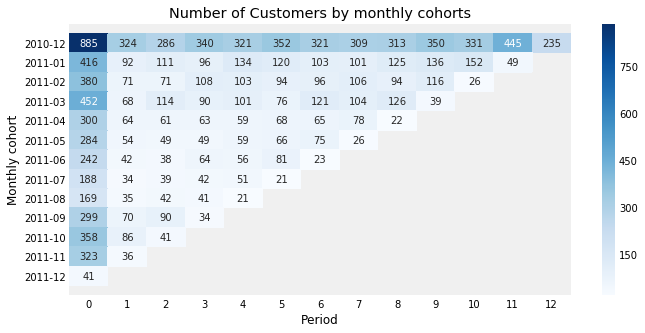

In [44]:
# Visualizing the number of customers within each monthly cohort and by period:  
plt.figure(figsize=(10,5))
plt.title("Number of Customers by monthly cohorts")
ax=sns.heatmap(cohort_counts, annot=True,cmap="Blues",xticklabels=cohort_counts.columns.astype(int),yticklabels=cohort_counts.index.strftime('%Y-%m'),fmt='g')
#adjust resolution top and bottom"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel("Period")
ax.set_ylabel("Monthly cohort")
plt.show()

This heatmap shows the number of customers classified by the month of their first transaction (monthly cohorts) and the  
number of periods that were observed: 
- The largest cohort belongs to the 885 customers that started purchasing in 2010/12.
- During the subsequent months, this e-commerce retail store gained at most 452 new customers in March. However, this number is  half of the total of customers that were acquired in December 2010. 

### Customer Retention Rate (CRR)
Once the monthly cohorts and periods been created, we are gonna calculate some metrics. The first one is the Customer Retention Rate that designates the percentage of customers the company has retained over a given time period.

**Retention Rate = ((CE-CN)/CS)) X 100** . Where: CE = number of customers at end of period, CN = number of new customers acquired during period,CS = number of customers at start of period.

In [45]:
# Number of customers at start of the period
cohort_sizes = cohort_counts.iloc[:,0]
# Divide all values in the cohort_counts table by cohort_sizes
retention=cohort_counts.divide(cohort_sizes,axis=0) 
# Calculate the retention rate
retention=retention.round(2)*100

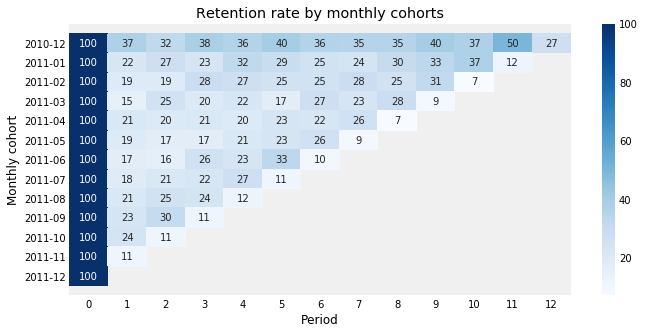

In [46]:
# Visualize average quantity metric using a heatmap
plt.figure(figsize=(10,5))
plt.title("Retention rate by monthly cohorts")

ax=sns.heatmap(retention, annot=True,cmap="Blues",xticklabels=retention.columns.astype(int),yticklabels=retention.index.strftime('%Y-%m'),fmt='g')
#adjust resolution top and bottom"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel("Period")
ax.set_ylabel("Monthly cohort")
plt.show()

This heatmap presents the retention rates for monthly cohorts. We have 13 cohorts, starting from 12/2010 and finishing on   
  12/2011. The eldest one (2010-12) is observed for 12 periods whereas the most recent one (2011-12) is observed 0 periods. 
- The eldest cohort has the highest retention rates for all the 12 periods. The most important retention rate is on 
  the eleventh period, which corresponds to the month of November 2011. In this month, 50% of the initial customers did a purchase.  
- For the monthly cohorts starting on 2011, the retention rate after the period 0 (first month transaction) fell from 100% to approximately 20%. In the penultimate period (corresponds to November), the retention rate reaches the maximum value within each cohort. For the periods situated between the first and the penultimate period, the retention rate remains on a similar range.

### Average Purchased Quantity 

In [47]:
grouping = onlinewc.groupby(["cohort_month","CohortIndex"])
cohort_data_q=grouping["Quantity"].mean() 
cohort_data_q=cohort_data_q.reset_index()

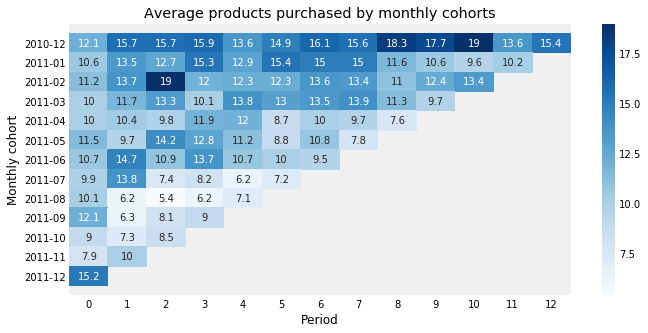

In [48]:
# Visualize average quantity purchased 
average_quantity=cohort_data_q.pivot(index="cohort_month",columns="CohortIndex",values="Quantity")
average_quantity=average_quantity.round(1)

plt.figure(figsize=(10,5))
plt.title("Average products purchased by monthly cohorts")
ax=sns.heatmap(average_quantity, annot=True,cmap="Blues",xticklabels=average_quantity.columns.astype(int),yticklabels=average_quantity.index.strftime('%Y-%m'),fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel("Period")
ax.set_ylabel("Monthly cohort")
plt.show()

This heatmap presents the average number of products purchased within each cohort
- When we look at the first rows of the heatmap, it seems the highest purchases were made by the eldest cohorts (blue is more intense). As we moved from the top to the bottom rows, the average purchases diminish (blue becomes less intense). This trend might be explained by the fact that there are more customers in the eldest cohort than in subsequent ones. 
- In particular, the average of purchases in most of the periods for the cohorts between 2010/12 and 2011/11 oscillates from 10 to 19 products. In contrast, the average of purchases in most of the periods for the cohorts between 2011/07 and 2011/11 were cutted by half remaining in a range between 5 and 10. 

### Monetary value per customer 

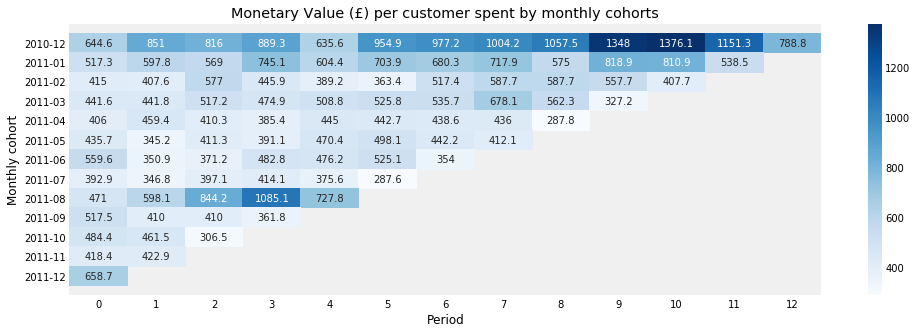

In [49]:
grouping = onlinewc.groupby(["cohort_month","CohortIndex"])
#adding the monetary_value per monthly cohort and period
cohort_data_mv=grouping["monetary_value"].sum() 

# Calculating the monetary value per customer: 
mv_per_customer=pd.concat([cohort_data_mv,cohort_data.set_index(["cohort_month","CohortIndex"])],axis=1)
mv_per_customer["mv_percustomer"]=round(mv_per_customer["monetary_value"]/mv_per_customer["CustomerID"],2)
mv_per_customer=mv_per_customer.reset_index().drop(columns=["monetary_value","CustomerID"])

# Visualize average monetary value metric
average_monetary_value=mv_per_customer.pivot(index="cohort_month",columns="CohortIndex",values="mv_percustomer")
average_monetary_value=average_monetary_value.round(1)

plt.figure(figsize=(15,5))
plt.title("Monetary Value (£) per customer spent by monthly cohorts")
ax=sns.heatmap(average_monetary_value, annot=True,cmap="Blues",xticklabels=average_monetary_value.columns.astype(int),yticklabels=average_monetary_value.index.strftime('%Y-%m'),fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel("Period")
ax.set_ylabel("Monthly cohort")
plt.show()

- The eldest cohort(2010-12) did purchases, during 11 out of 13 periods, which monetary value were the highest.
- The customers from November 2011 did relatively better in 6 out of 13 periods than the customers arriving in the posterior months. 
- The amount of money spend by customer for the rest of the monthly periods, with the exception of August, is not that high in comparison to the monthly cohorts of 2010-12 and 2011-11.  

## 3.2 Recency Frequency Monetary Value (RFM) model

RFM segmentation is a powerful way to identify groups of customers for special treatment based on 3 elements: **Recency**: How recent was the customers last purchase ?, **Frequency**: How many purchases the customer has done in the last 12 months?,**Monetary value**: How much does the customer spend in the last 12 months?

**Defining the years to analyze**

Since we are interested in the last 12 months, we we are gonna keep only customers that bought during 2010/12/09 and 2011/12/11.

In [50]:
onlinewc_m=onlinewc.copy()

In [51]:
# Keeping only the last 12 months:
onlinewc_m["InvoiceDate"]=pd.to_datetime(onlinewc_m["InvoiceDate"])
onlinewc_m["InvoiceDate"]=onlinewc_m["InvoiceDate"].dt.date
print("Min:{};Max:{}".format(min(onlinewc_m.InvoiceDate),max(onlinewc_m.InvoiceDate)))

Min:2010-12-01;Max:2011-12-09


In [52]:
# Keep exactly the same day: 
onlinewc_m=onlinewc_m[onlinewc_m.InvoiceDate>dt.date(2010,12,9)]
print("Min:{};Max:{}".format(min(onlinewc_m.InvoiceDate),max(onlinewc_m.InvoiceDate)))

Min:2010-12-10;Max:2011-12-09


In [53]:
#Create hypothetical snap_shot day as if we're doing analysis today : 
snapshot_date=max(onlinewc_m["InvoiceDate"])+dt.timedelta(days=1)
snapshot_date # "the today in the real world"

datetime.date(2011, 12, 10)

**Creating RFM metrics**

In [54]:
# Calculate the amount of money spend per transaction:  
onlinewc_m["TotalSum"]=onlinewc_m["Quantity"]*onlinewc_m["UnitPrice"]

# Aggregate data on a customer level
onlinewc_m=onlinewc_m.groupby("CustomerID").agg({"InvoiceDate":lambda x:(snapshot_date-x.max()).days,"InvoiceNo":"count","TotalSum":"sum"})

#rename columns for easier interpretation:
onlinewc_m.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","TotalSum":"MonetaryValue"},inplace=True)

**Building RFM segments**

Each of the customers has a Recency, Frequency and Monetary Value. In order to create a score based on those three elements, we are going to divide the distribution of each factor in quartiles. After, we are going to place the recency, frequency and monetary values into one quartile, and attribute a number that ranges from 1 to 4. The highest score 4,4,4 belongs to customers that made more purchases, spent more money, and purchased more recently. The lowest score 1,1,1,belongs to customers that bought the least, spent the least, and purchased the longest ago. 

In [55]:
r_labels= range(4,0,-1)
r_quartiles=pd.qcut(onlinewc_m["Recency"],4,labels=r_labels)
onlinewc_m=onlinewc_m.assign(R=r_quartiles.values)

In [56]:
f_labels= range(1,5)
f_quartiles=pd.qcut(onlinewc_m["Frequency"],4,labels=f_labels)
onlinewc_m=onlinewc_m.assign(F=f_quartiles.values)

In [57]:
m_labels= range(1,5)
m_quartiles=pd.qcut(onlinewc_m["MonetaryValue"],4,labels=m_labels)
onlinewc_m=onlinewc_m.assign(M=m_quartiles.values)

In [58]:
def join_rfm(x):return str(x["R"])+str(x["F"])+str(x["M"])
onlinewc_m["RFM_segment"]=onlinewc_m.apply(join_rfm,axis=1)
onlinewc_m["RFM_Score"]=onlinewc_m[["R","F","M"]].sum(axis=1)
onlinewc_m.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12347.0,3,151,3598.21,4,4,4,444,12.0
12348.0,76,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,311,17,334.40,1,1,2,112,4.0
12352.0,37,85,2506.04,3,3,4,334,10.0


We see each of the customers has a Recency, Frequency and Monetary Value. Each element  has a corresponding value R,F,M that ranges from 1 to 4. RFM segment corresponds to the concatenation of the 3 values and the RFM score corresponds to the sum of the 3 values. 

**Grouping into named segments**: 

Based on the RFM-score, we are gonna create three arbitrary categories to classify the customers: gold, silver and bronze

In [59]:
def segment_me(df):
    if df["RFM_Score"]>=9:
        return "Gold"
    elif (df["RFM_Score"]>=5) and(df["RFM_Score"]<9):
        return "Silver"
    else:
        return "Bronze"
    
onlinewc_m["General_Segment"]=onlinewc_m.apply(segment_me,axis=1)

# looking statistics across 3 segments: 
rfm=onlinewc_m.groupby("General_Segment").agg({"Recency":"mean","Frequency":"mean","MonetaryValue":["mean","count"]}).round(1)
rfm=rfm.reindex(["Gold","Silver","Bronze"]).reset_index()
rfm

General_Segment Recency Frequency MonetaryValue      
                     mean      mean          mean count
0            Gold    26.0     186.2        4222.1  1638
1          Silver    95.2      34.9         678.5  1866
2          Bronze   205.6      11.1         196.5   759

**What's the % of customers belonging to each category?**

In [60]:
gold=(rfm.loc[rfm["General_Segment"]=="Gold"]["MonetaryValue"]["count"]/rfm["MonetaryValue"]["count"].sum())*100
silver=(rfm.loc[rfm["General_Segment"]=="Silver"]["MonetaryValue"]["count"]/rfm["MonetaryValue"]["count"].sum())*100
bronze=(rfm.loc[rfm["General_Segment"]=="Bronze"]["MonetaryValue"]["count"]/rfm["MonetaryValue"]["count"].sum())*100
print ({"gold":round(gold,1),"silver":round(silver,1),"Bronze":round(bronze,1)})


{'gold': 0    38.4
Name: count, dtype: float64, 'silver': 1    43.8
Name: count, dtype: float64, 'Bronze': 2    17.8
Name: count, dtype: float64}


- Most of the customers (43.8%) that did a purchase during 2011 belong to the category "silver" whereas the second category with 5% points less is  the "gold" one. 
- Only 17.8% of the customers are classified as bronze customers. 
- Customers belonging to the category gold bought on average 26 days ago, purchased 186 times and spent 4222 pounds. 
- Customers classified as silver bought on average three months ago, 35 times and spent 679 pounds. 
- Customers belonging to the bronze category bought 7 months ago, bought 11 times and spent 196 pounds. 

**Adding other characteristics to each segment:**

In [61]:
#Adding other variables to the dataframe containg the rfm metrics: 
# copying the dataframe created for the cohort analysis: 
onlinewc_=onlinewc.copy()
onlinewc_=onlinewc_.groupby(["CustomerID","Country","cohort_month"],as_index=False).agg({"distance_uk":"mean"}).round(1)
onlinewc_=onlinewc_.set_index("CustomerID")
onlinewc_m=onlinewc_.merge(onlinewc_m,how="left",left_index=True, right_index=True)
gold=onlinewc_m[onlinewc_m["General_Segment"]=="Gold"]
silver=onlinewc_m[onlinewc_m["General_Segment"]=="Silver"]
bronze=onlinewc_m[onlinewc_m["General_Segment"]=="Bronze"]

In [62]:
gold.describe(include="all").round(1).iloc[:7,:3]

,Country,cohort_month,distance_uk
count,1644,1644,1642.0
unique,27,13,NaN
top,United Kingdom,2010-12-01 00:00:00,NaN
freq,1457,526,NaN
first,NaN,2010-12-01 00:00:00,NaN
last,NaN,2011-12-01 00:00:00,NaN
mean,NaN,NaN,186.3


When we look at the customers considered in the gold category, we realize other characteristics: 
- Most of them come from the United Kingdom (88%). 
- Average distance is 186 km from the United Kingdom. 
- One third of them (32%) belonged to the eldest monthly cohort (2010/12). 

In [63]:
silver.describe(include="all").round(1).iloc[:7,:3]

,Country,cohort_month,distance_uk
count,1868,1868,1862.0
unique,30,13,NaN
top,United Kingdom,2011-11-01 00:00:00,NaN
freq,1682,259,NaN
first,NaN,2010-12-01 00:00:00,NaN
last,NaN,2011-12-01 00:00:00,NaN
mean,NaN,NaN,196.1


When we look at the customers considered in the silver category, we realize other characteristics: 
- Most of them come from the United Kingdom (90%). 
- Average distance is 196 km from the United Kingdom. 
- 14% of the customers belonged to the monthly cohort of 2011/11, which is a recent cohort.  

In [64]:
bronze.describe(include="all").round(1).iloc[:7,:3]

,Country,cohort_month,distance_uk
count,759,759,757.0
unique,19,11,NaN
top,United Kingdom,2011-03-01 00:00:00,NaN
freq,714,106,NaN
first,NaN,2010-12-01 00:00:00,NaN
last,NaN,2011-10-01 00:00:00,NaN
mean,NaN,NaN,145.7


When we look at the customers considered in the bronze category, we realize other characteristics: 
- Most of them come from the United Kingdom (94%). 
- Average distance is 145 km from the United Kingdom. 
- 14% of the customers belonged to the monthly cohort of 2011/03. 

**How much money do each category represent?**

In [65]:
mv_g=gold["MonetaryValue"].sum()
mv_s=silver["MonetaryValue"].sum()
mv_b=bronze["MonetaryValue"].sum()
total=mv_g+mv_s+mv_b
print({"monetary value % of gold customers": round(mv_g/total*100,2),"monetary value % of silver customers": round(mv_s/total*100,2),"monetary value % of bronze customers": round(mv_s/total*100,2) })

{'monetary value % of gold customers': 83.03, 'monetary value % of silver customers': 15.18, 'monetary value % of bronze customers': 15.18}


- 83.2% of the annual sales of 2011 come from the gold customers, and only 15% come from the silver one. 

**How much money do the eldest cohort do?**

In [66]:
mv_g_old_cohort=gold[gold["cohort_month"]=='2010-12-01T00:00:00.000000000']["MonetaryValue"].sum()
print(round (mv_g_old_cohort/total*100,2))

48.24


# 4. Conclusion and recommendations 

In this project, we explored a dataset from customer's transactions between 2010 and 2011 from a non-store online retail based and registered in the United Kingdom. The exploratory analysis of data showed that the e-commerce did better by the last three months of the year in comparison to the previous ones. There was an increase in the sales revenue and in the number of customers. However, there was a lack of diversification of the clients: 90% came from the UK and they represented 80% of the sales revenue. Even if there was a decreased in the percentage of cancellations by the end of 2011, we don't know if those won't be reflected in the next quarter of 2012. 

One strategy to continue increasing the revenue from this online retail store is by targeting the customers according to their specific characterists. As part of our analysis, we performed a cohort analysis and the RFM model, which main results were: 

- A decreased by half in the number of customers acquired in November 2011 in comparison to the "eldest cohort" which is December 2010 (12/2010). Moreover,the average number of customers acquired from January to November 2011 was of 272, which is 3 times less than in December 2010.  
- The "quality" of the average customer acquired over 2011 decreased in comparison to the eldest cohort. For instance, the customers from the eldest cohort had the highest retention rates for all the 12 periods, and did purchases which monetary value was the highest. In addition, the average of the quantities purchased by clients from the most recent cohorts reduced by half in comparison to the eldest one.  
- Our RFM model revealed that 62% of the customers, classified as silver or bronze, represented only 17% of the purchases made in 2011. However, 38% of the clients classified as "golden" represented 83% of the sales made in 2011. Among the golden clients, 12% belonged to the eldest cohort and they represented 48% of the purchases made during 2011. 

**Recommendations that can be adopted by the marketing team:**
-  We recommend to implement a survey among the eldest and recent cohorts to analyze which are the factors affecting their puchase behaviour.
- We recommend to target new offers to the customers living in countries situated in a range of of 1 to 2000 km. We consider that those clients are most likely to repond to the offers since the costs of distribution are not that high.